In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Uber Data/uber-data-sep14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
df.describe()

,Lat,Lon
count,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01
std,4.082861e-02,5.831413e-02
min,3.998970e+01,-7.477360e+01
25%,4.072040e+01,-7.399620e+01
50%,4.074180e+01,-7.398310e+01
75%,4.076120e+01,-7.396280e+01
max,4.134760e+01,-7.271630e+01


In [4]:
df.shape


(1028136, 4)

In [5]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [7]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"]) 
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


In [9]:
df["Day"] = df["Date/Time"].apply(lambda x: x.day)
df["Weekday"] = df["Date/Time"].apply(lambda x: x.weekday())
df["Hour"] = df["Date/Time"].apply(lambda x: x.hour)
print(df.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


# Analyzed data for Uber trips in September, categorizing it by days and hours. Reviewing the data to determine which day had the highest number of Uber trips.

<Axes: xlabel='Day', ylabel='Count'>

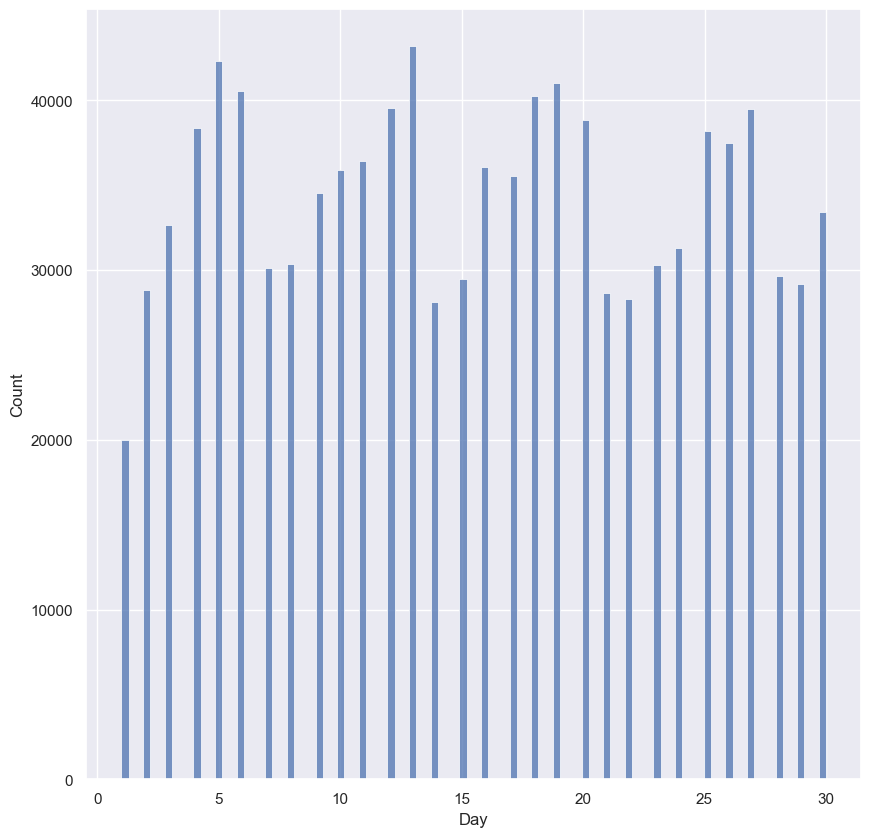

In [10]:
sns.set(rc = {'figure.figsize': (10,10)})
sns.histplot(df['Day'])

# By examining the daily trips, it is evident that Uber trips increase on weekdays and decrease on weekends. Now, let's analyze the Uber trips according to the hours.


<Axes: xlabel='Hour', ylabel='Count'>

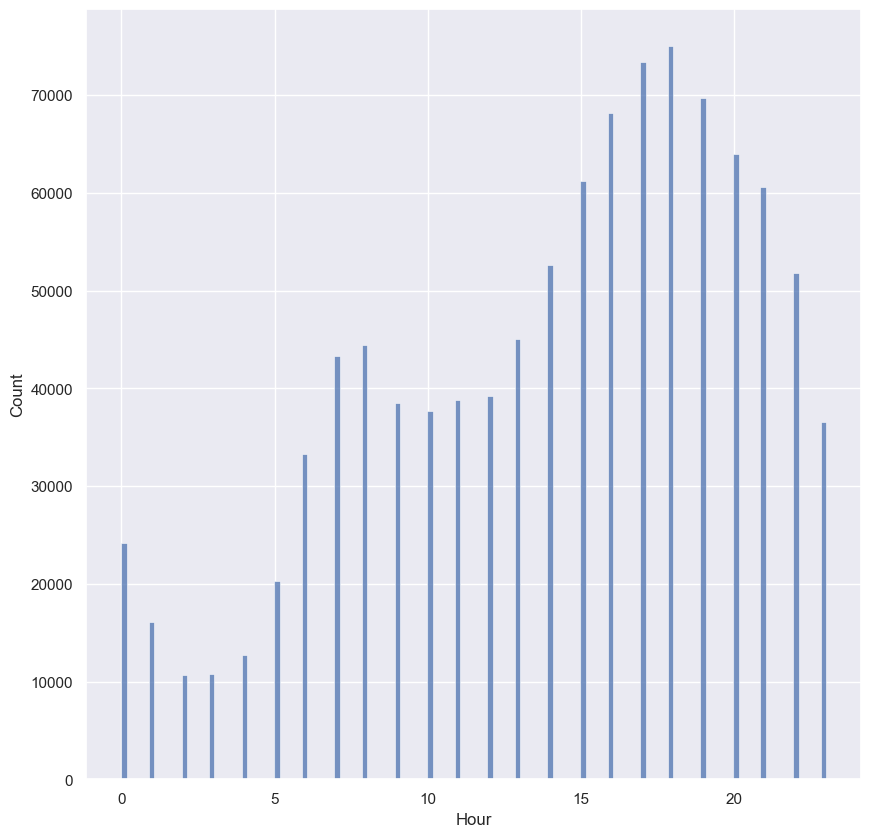

In [11]:
sns.histplot(df["Hour"])

# According to the hourly data, Uber trips decrease after midnight and then start increasing after 5 am. The trips continue to rise until 6 pm, which is the busiest hour for Uber, then the trips start decreasing. Now, let's analyze the Uber trips according to the weekdays.


<Axes: xlabel='Weekday', ylabel='Count'>

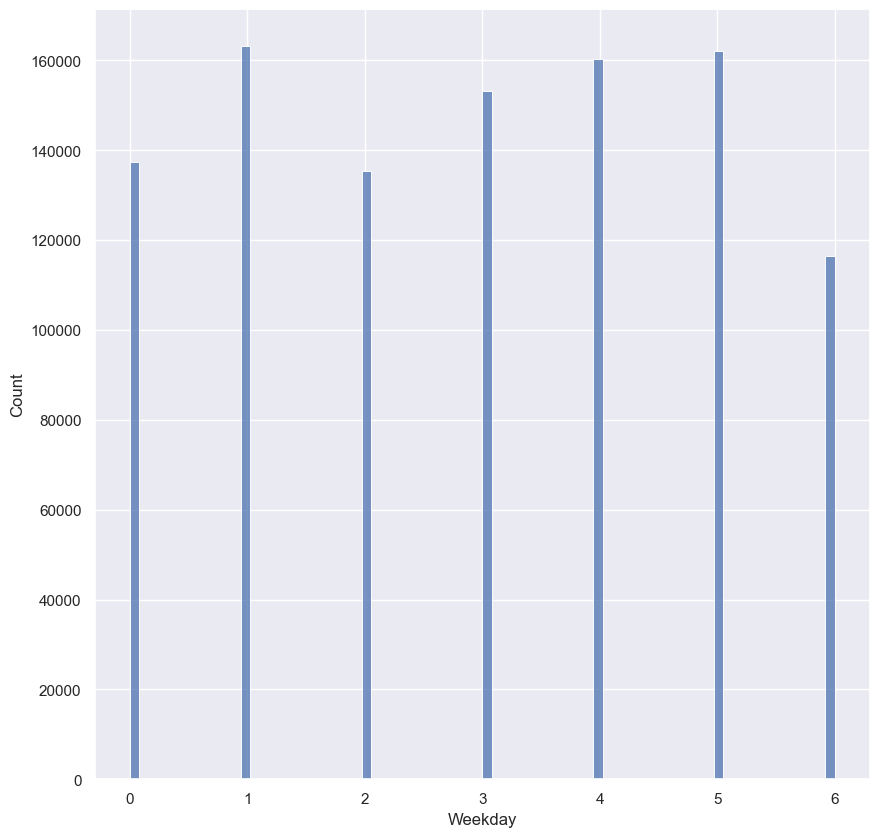

In [12]:
sns.histplot((df["Weekday"])) 

# In the above figure, 0 indicates Sunday. On Sundays, Uber trips are more frequent than on Saturdays, suggesting that people use Uber for outings as well as for commuting to work. Saturdays have the lowest number of Uber trips, while Mondays have the highest.


# Summary
# This analysis of Uber trips in New York City leads to the following conclusions:
# 1.  Monday is the most profitable day for Uber.
# 2. Saturdays have the fewest Uber trips.
# 3. 6 pm is the busiest hour for Uber.
# 4. On average, Uber trips start to rise around 5 am.
